In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import itertools

#loading the data set
df = pd.read_csv("exchange_rate.csv")
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y %H:%M")
df.set_index('date', inplace=True)

In [3]:
df.isnull().sum()

,0
Ex_rate,0


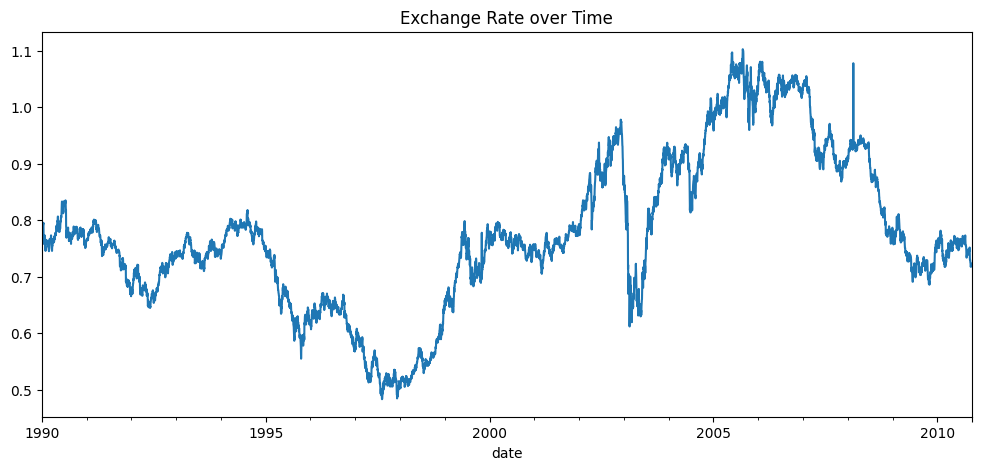

In [4]:
df['Ex_rate'].plot(figsize=(12,5), title="Exchange Rate over Time")
plt.show()

In [5]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print(" Stationary")
    else:
        print("Non-stationary")

print("\nADF Test on Original Data")
adf_test(df['Ex_rate'])


ADF Test on Original Data
ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477
Non-stationary


In [6]:
train_size = int(len(df) * 0.8)
train, test = df['Ex_rate'][:train_size], df['Ex_rate'][train_size:]

In [7]:
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

forecast = model_fit.forecast(steps=len(test))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 6070
Model:                 ARIMA(1, 1, 1)   Log Likelihood               22719.046
Date:                Mon, 20 Oct 2025   AIC                         -45432.092
Time:                        05:35:06   BIC                         -45411.959
Sample:                    01-01-1990   HQIC                        -45425.104
                         - 08-14-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5972      0.062     -9.648      0.000      -0.719      -0.476
ma.L1          0.5398      0.064      8.430      0.000       0.414       0.665
sigma2      3.281e-05   1.95e-07    168.198      0.0

In [8]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast)

In [9]:
print("Evaluation on Test Data:")
print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)


Evaluation on Test Data:
MAE: 0.17770970449121345
RMSE: 0.2054366965966928
MAPE: 0.22797966173811554


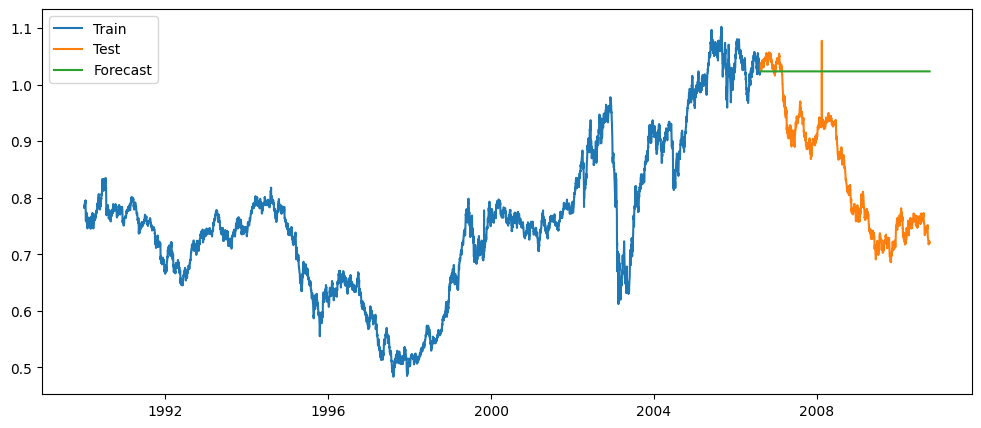

In [10]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test")
plt.plot(test.index, forecast, label="Forecast")
plt.legend()
plt.show()

In [11]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

In [12]:
best_rmse = float("inf")
best_order = None

In [13]:
for order in pdq:
    try:
        model = ARIMA(train, order=order)
        model_fit = model.fit()
        pred = model_fit.forecast(steps=len(test))
        error = np.sqrt(mean_squared_error(test, pred))
        if error < best_rmse:
            best_rmse = error
            best_order = order
    except:
        continue

print("\nBest ARIMA order (Grid Search):", best_order, "with RMSE:", best_rmse)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat


Best ARIMA order (Grid Search): (1, 0, 0) with RMSE: 0.11030067137971172


In [14]:
best_aic = float("inf")
best_order_aic = None

In [15]:
for order in pdq:
    try:
        model = ARIMA(train, order=order)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order_aic = order
    except:
        continue

print("Best ARIMA order (AIC):", best_order_aic, "with AIC:", best_aic)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Best ARIMA order (AIC): (1, 1, 1) with AIC: -45432.09158294726


In [16]:
final_model = ARIMA(df['Ex_rate'], order=best_order_aic)
final_fit = final_model.fit()

future_forecast = final_fit.forecast(steps=30)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [17]:
final_model = ARIMA(df['Ex_rate'], order=best_order_aic)
final_fit = final_model.fit()

future_forecast = final_fit.forecast(steps=30)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


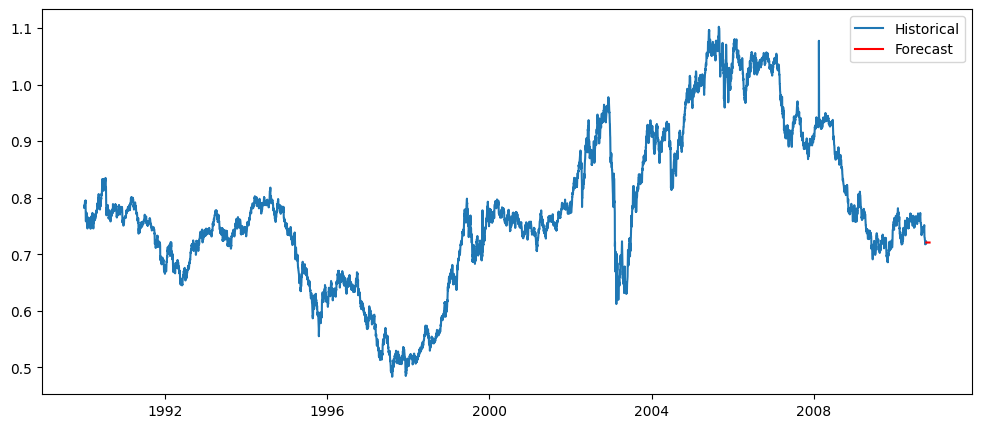

In [18]:
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq="D")

plt.figure(figsize=(12,5))
plt.plot(df.index, df['Ex_rate'], label="Historical")
plt.plot(forecast_index, future_forecast, label="Forecast", color="red")
plt.legend()
plt.show()